1.	Import seaborn, pandas, and numpy, and then read in the dataset ‘geyser’ from seaborn

In [1]:
import seaborn as sbs
import pandas as pd
import numpy as np

In [3]:
sbs.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
dataset_original = sbs.load_dataset('geyser')
print(dataset_original.shape)
dataset_original.head()

(272, 3)


,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


2.	Create a copy of the original data called ‘max_testing_data’

a.	Calculate the longest duration per waiting period, and drop all shorter durations at each waiting period

b.	Find the median duration and median waiting of the short and long kinds independently without creating any temporary datasets (you should be changing pandas functions and filters)

c.	Create two functions: short_modifier and long_modifier which each take in duration and waiting values, and attempts to divide them and return the result

i.	In the long_modifier divide duration / waiting

ii.	In the short_modifier divide the waiting / duration

d.	Apply these functions on the dataframe, and return the values to interval_ratio, but you must apply the function by filtering using loc. You should not write the functions such that it uses any sort of if statement to check kind. 



In [5]:
# create a copy of original data
max_testing_data = dataset_original.copy(deep=True)
max_testing_data.shape

(272, 3)

In [6]:
max_testing_data.head(2)

,duration,waiting,kind
0,3.6,79,long
1,1.8,54,short


a. Calculate the longest duration per waiting period, and drop all shorter durations at each waiting period

In [8]:
# get those indices in the dataframe where only longest duration rows are fetched
# shorter durations are dropped
idx = max_testing_data.groupby(['waiting'])['duration'].transform(max) == max_testing_data['duration']

In [80]:
max_testing_data_longest_duration = max_testing_data[idx].copy()
max_testing_data_longest_duration.head()

,duration,waiting,kind
5,2.883,55,short
15,2.167,52,short
17,4.800,84,long
24,4.533,74,long
37,4.833,80,long


In [81]:
max_testing_data_longest_duration.shape

(54, 3)

b. Find the median duration and median waiting of the short and long kinds independently without creating any temporary datasets (you should be changing pandas functions and filters)

In [82]:
print("Median of duration when the kind is 'short' is : ")
print(max_testing_data_longest_duration.loc[max_testing_data_longest_duration["kind"]=="short"]["duration"].median())
print("Median of duration when the kind is 'long' is : ")
print(max_testing_data_longest_duration.loc[max_testing_data_longest_duration["kind"]=="long"]["duration"].median())

Median of duration when the kind is 'short' is : 
2.275
Median of duration when the kind is 'long' is : 
4.8


In [83]:
print("Median of waiting when the kind is 'short' is : ")
print(max_testing_data_longest_duration.loc[max_testing_data_longest_duration["kind"]=="short"]["waiting"].median())
print("Median of waiting when the kind is 'long' is : ")
print(max_testing_data_longest_duration.loc[max_testing_data_longest_duration["kind"]=="long"]["waiting"].median())

Median of waiting when the kind is 'short' is : 
55.5
Median of waiting when the kind is 'long' is : 
81.5


c.	Create two functions: short_modifier and long_modifier which each take in duration and waiting values, and attempts to divide them and return the result

i.	In the long_modifier divide duration / waiting

ii.	In the short_modifier divide the waiting / duration

In [84]:
def short_modifier(duration, waiting):
  return waiting/duration

def long_modifier(duration, waiting):
  return duration/waiting

d. Apply these functions on the dataframe, and return the values to interval_ratio, but you must apply the function by filtering using loc. You should not write the functions such that it uses any sort of if statement to check kind.

In [85]:
max_testing_data_longest_duration.loc[max_testing_data_longest_duration["kind"]=="short", 'interval_ratio'] = max_testing_data_longest_duration.loc[
                                                  max_testing_data_longest_duration["kind"]=="short"].apply(
                                                      lambda row: short_modifier(row['duration'], 
                                                                                 row['waiting']), axis=1)

In [86]:
max_testing_data_longest_duration.head()

,duration,waiting,kind,interval_ratio
5,2.883,55,short,19.077350
15,2.167,52,short,23.996308
17,4.800,84,long,NaN
24,4.533,74,long,NaN
37,4.833,80,long,NaN


In [87]:
max_testing_data_longest_duration.loc[max_testing_data_longest_duration["kind"]=="long", 'interval_ratio'] = max_testing_data_longest_duration.loc[
                                                  max_testing_data_longest_duration["kind"]=="long"].apply(
                                                      lambda row: long_modifier(row['duration'], 
                                                                                 row['waiting']), axis=1)

In [88]:
max_testing_data_longest_duration.head()

,duration,waiting,kind,interval_ratio
5,2.883,55,short,19.077350
15,2.167,52,short,23.996308
17,4.800,84,long,0.057143
24,4.533,74,long,0.061257
37,4.833,80,long,0.060413


In [89]:
# sanity check if the above does not result it any NaN values
max_testing_data_longest_duration.isna().all().any()

False

3.	Write some function that does a somewhat computationally complex task on a value / row of data. Using python time functions, apply this function on the dataframe and time it. 

    a.	Then apply this same function on the dataframe using pandarallel’s parallel_apply, and time this. 

    b.	Experiment with the timing / different functions
    
    c.	Compare the run times


In [94]:
import time
current = time.time()


def custom_function(duration):
  # add a half second sleep
  time.sleep(0.5)
  return duration/2

max_testing_data_longest_duration['semi_duration'] = max_testing_data_longest_duration.apply(lambda row: custom_function(row['duration']), axis=1)
print("Time taken: ", time.time() - current, " seconds")


Time taken:  27.042936325073242  seconds


In [96]:
!pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.6.1-py3-none-any.whl size=16265 sha256=87de6e281daf7facaa80af53d31797ff0a8fbe455cff7c4996355e96df11769c
  Stored in directory: /root/.cache/pip/wheels/e8/81/8f/29aafd7d671a4e9db4e976d71728870173f0b3f48ccba0bc32
Successfully built pandarallel


In [97]:
from pandarallel import pandarallel

In [98]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [99]:
import time
current = time.time()


def custom_function(duration):
  # add a half second sleep
  time.sleep(0.5)
  return duration/2

max_testing_data_longest_duration['semi_duration_parallel'] = max_testing_data_longest_duration.parallel_apply(lambda row: custom_function(row['duration']), axis=1)
print("Time taken: ", time.time() - current, " seconds")

Time taken:  27.191381692886353  seconds


4.	Find a plot which represents the duration against waiting times the best. Make sure you separate by kind, and describe the trends in the data.

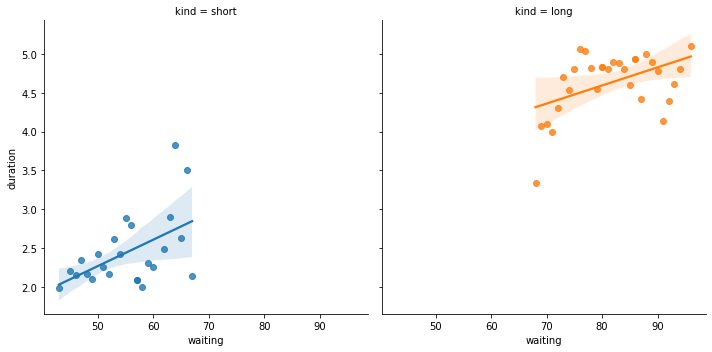

In [102]:
sbs.lmplot(x="waiting", y="duration", col="kind", hue='kind', data=max_testing_data_longest_duration)


**Insights:**
- For the "short" kind, the durations and waiting values are aligned to the smaller values which makes sense and vice-vers with  "long" kind.
- It seems the points are closely in compact with the regression line for kind "long" whicn means that the relationship between "waiting" and "duration" is more likely "linear" compared to those data points with kind "short"
